<a href="https://colab.research.google.com/github/riyaagar96/Berkeley_X415.1/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

# Upload "avocado.csv" here

Saving avocado.csv to avocado.csv


In [ ]:
import pandas as pd
import io
avocados = pd.read_csv(io.StringIO(uploaded['avocado.csv'].decode('utf-8')))
avocados['Year'] = pd.DatetimeIndex(avocados['Date']).year
avocados['Month'] = pd.DatetimeIndex(avocados['Date']).month


In [ ]:
display(avocados)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,2
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set(style = "ticks", color_codes = True)

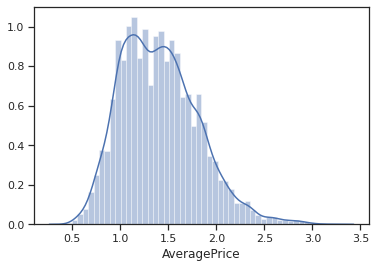

In [ ]:
#seeing the distribution for our target variable
sns.distplot(avocados['AveragePrice'])


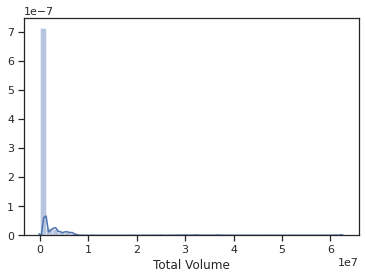

In [ ]:
sns.distplot(avocados['Total Volume'])

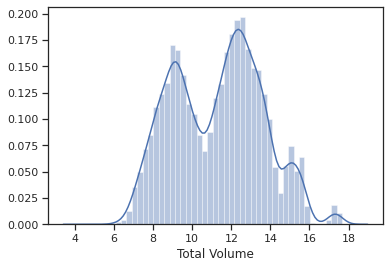

In [ ]:

target = np.log(avocados['Total Volume'])
sns.distplot(target)

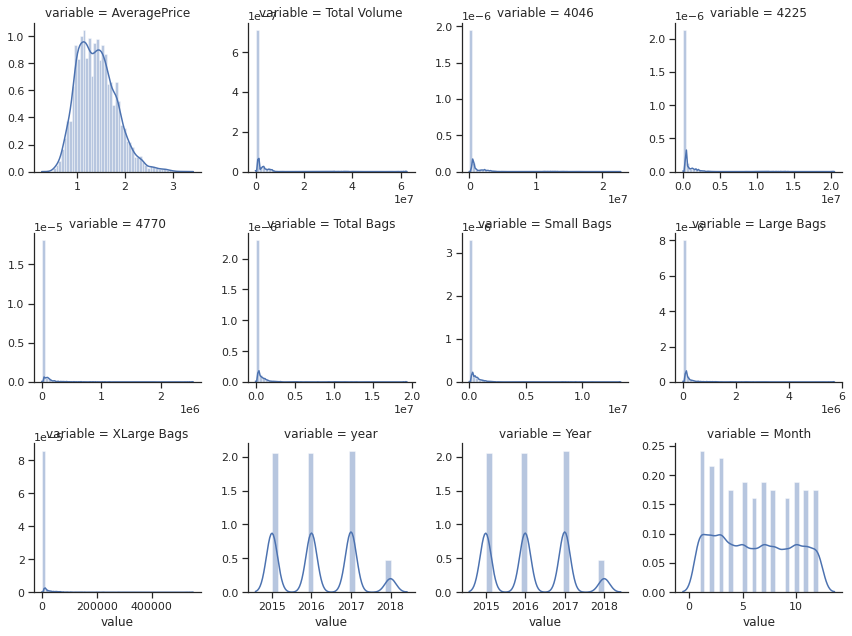

In [ ]:
#creating histogram for each numeric variable 

num = [f for f in avocados.columns if avocados.dtypes[f] != 'object']
num.remove('Unnamed: 0')
nd = pd.melt(avocados, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


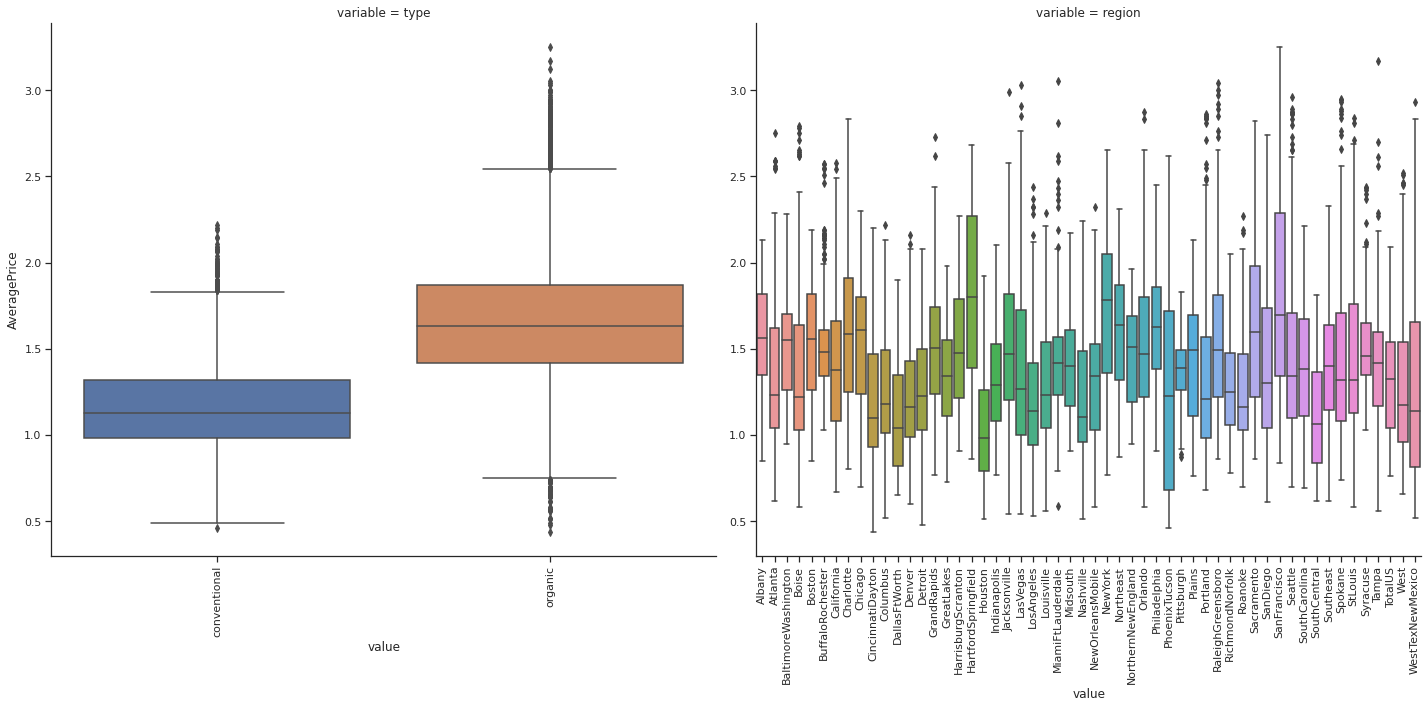

In [ ]:
#creating boxplots for all non-numeric data 

def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in avocados.columns if avocados.dtypes[f] == 'object']

p = pd.melt(avocados, id_vars='AveragePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=10)
g = g.map(boxplot, 'value','AveragePrice')
g

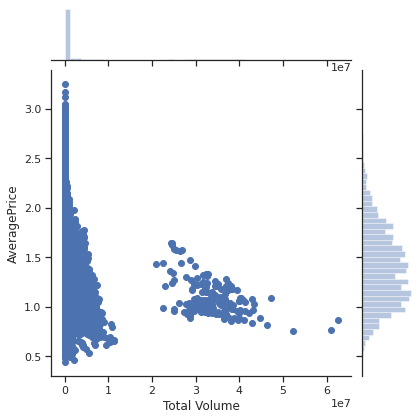

In [ ]:
#relationship between total volume and average price 

a = sns.jointplot(x=avocados['Total Volume'], y=avocados['AveragePrice'])

Text(0.5, 0, 'Average Price')

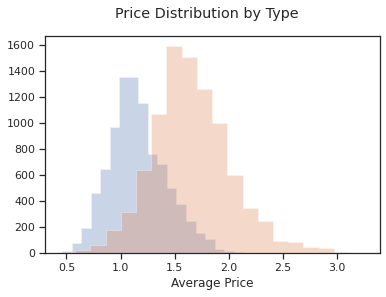

In [ ]:
#distribution of avocado prices by type (organic and conventional)

avo_conv = avocados[avocados['type'] == 'conventional']
avo_org = avocados[avocados['type'] == 'organic']
plt.hist(avo_conv['AveragePrice'], histtype='stepfilled', alpha=0.3, bins = 20)
plt.hist(avo_org['AveragePrice'], histtype='stepfilled', alpha=0.3, bins = 20)
plt.suptitle('Price Distribution by Type')
plt.xlabel('Average Price')


Text(0.5, 0, 'Total Volume (log scale)')

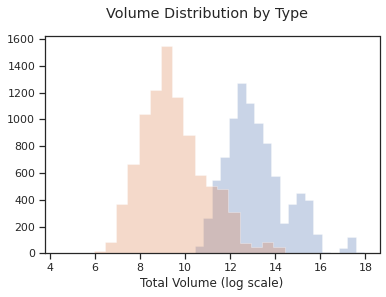

In [ ]:
plt.hist(np.log(avo_conv['Total Volume']), histtype='stepfilled', alpha=0.3, bins = 20)
plt.hist(np.log(avo_org['Total Volume']), histtype='stepfilled', alpha=0.3, bins = 20)
plt.suptitle('Volume Distribution by Type')
plt.xlabel('Total Volume (log scale)')


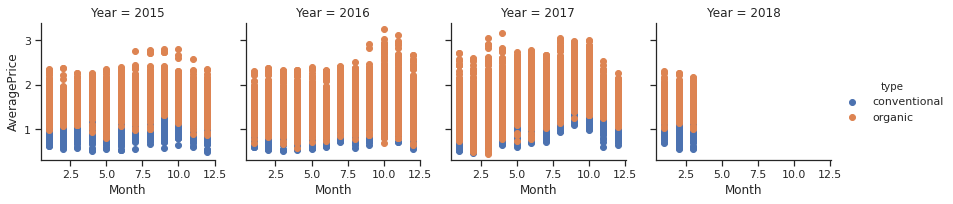

In [ ]:
g = sns.FacetGrid(avocados, col = "Year", hue = "type")
g = (g.map(plt.scatter, "Month", "AveragePrice").add_legend())

Prices for organic avocados rose around the fall of 2016 and the spring of 2017. It's possible that this had something to do with the supply of avocados (low supply = high price) or with the demand for avocados (e.g. increase in popularity of avocado based foods). Since we don't have demand data, we'll compare price data against the volume of avocados sold. 

Text(0.5, 0.98, 'Average Monthly Volume, Conventional Avocados')

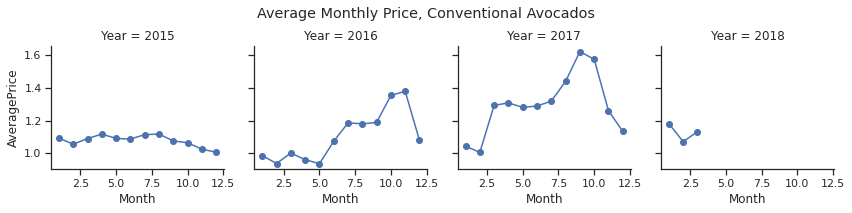

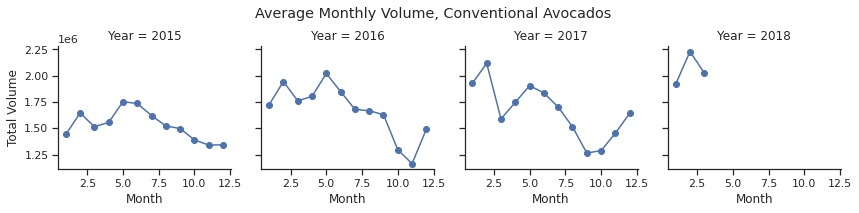

In [ ]:
#Looking at average monthly price and volume for conventional avocados

a_conv = avo_conv.groupby(['Year', pd.Grouper(key = 'Month')])['AveragePrice'].mean().to_frame(name = "AveragePrice").reset_index()
a_conv_v = avo_conv.groupby(['Year', pd.Grouper(key = 'Month')])['Total Volume'].mean().to_frame(name = "Total Volume").reset_index()
#display(a_conv)

#display(a_org)
h = sns.FacetGrid(a_conv, col = "Year")
h.map(plt.scatter, "Month", "AveragePrice")
h.map(plt.plot, "Month", "AveragePrice")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Average Monthly Price, Conventional Avocados')

i = sns.FacetGrid(a_conv_v, col = "Year")
i.map(plt.scatter, "Month", "Total Volume")
i.map(plt.plot, "Month", "Total Volume")
plt.subplots_adjust(top=0.8)
i.fig.suptitle('Average Monthly Volume, Conventional Avocados')


Text(0.5, 0.98, 'Average Monthly Volume, Organic Avocados')

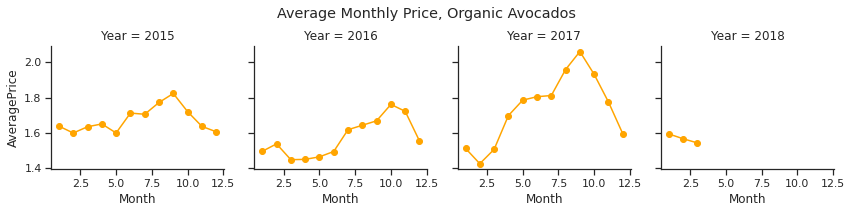

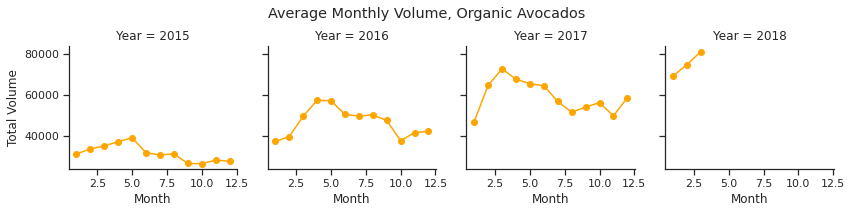

In [ ]:
#Looking at average monthly price and volume for organic avocados

a_org = avo_org.groupby(['Year', pd.Grouper(key = 'Month')])['AveragePrice'].mean().to_frame(name = "AveragePrice").reset_index()
a_org_v = avo_org.groupby(['Year', pd.Grouper(key = 'Month')])['Total Volume'].mean().to_frame(name = "Total Volume").reset_index()

h = sns.FacetGrid(a_org, col = "Year")
h.map(plt.scatter, "Month", "AveragePrice", color = "orange")
h.map(plt.plot, "Month", "AveragePrice", color = "orange")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Average Monthly Price, Organic Avocados')

i = sns.FacetGrid(a_org_v, col = "Year")
i.map(plt.scatter, "Month", "Total Volume", color = "orange")
i.map(plt.plot, "Month", "Total Volume", color = "orange")
plt.subplots_adjust(top=0.8)
i.fig.suptitle('Average Monthly Volume, Organic Avocados')

#to-do: change color of graph for organic avocados to orange so that it's easier to tell the difference. 

We can see that for both conventional and organic avocados, price and volume have an inverse relationship. As a larger volume of avocados move through the market, price falls and vice versa. Additionally, we can tell that the yearly average price for avocados peaks during month 9-10, or fall season. It's possible that avocado prices follow a seasonal trend and grow well during spring. There's also a significant drop in avocado prices towards the end of each year (months 10-12).

It might also be helpful to understand whether or not there are significant monthly increases between years. 


Text(0.5, 0.98, 'Conventional Avocados: Monthly average price difference (YoY, %)')

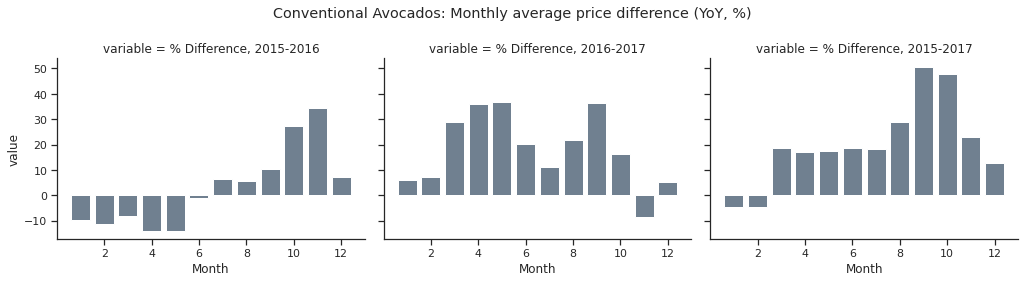

In [ ]:
#Looking at yearly changes in price for conventional avocados (with monthly % diff in price)

a_conv_2015 = a_conv[a_conv['Year'] == 2015].set_index('Month')
a_conv_2015.rename(columns = {'AveragePrice':'2015'}, inplace = True) 
a_conv_2016 = a_conv[a_conv['Year'] == 2016].set_index('Month')
a_conv_2016.rename(columns = {'AveragePrice':'2016'}, inplace = True) 
a_conv_2017 = a_conv[a_conv['Year'] == 2017].set_index('Month')
a_conv_2017.rename(columns = {'AveragePrice':'2017'}, inplace = True) 

a_conv_2015['2016'] = pd.Series(a_conv_2016['2016'].astype(float))
a_conv_2015['2017'] = pd.Series(a_conv_2017['2017'].astype(float))
a_conv_2015['% Difference, 2015-2016'] = (a_conv_2015['2016'] - a_conv_2015['2015'])/a_conv_2015['2015'] * 100
a_conv_2015['% Difference, 2016-2017'] = (a_conv_2015['2017'] - a_conv_2015['2016'])/a_conv_2015['2016'] * 100
a_conv_2015['% Difference, 2015-2017'] = (a_conv_2015['2017'] - a_conv_2015['2015'])/a_conv_2015['2015'] * 100

a_conv_2015 = a_conv_2015.reset_index()

price_diff_conv = pd.melt(a_conv_2015, id_vars=['Month'], value_vars=['% Difference, 2015-2016', '% Difference, 2016-2017', '% Difference, 2015-2017'])

h = sns.FacetGrid(price_diff_conv, col = "variable", height = 4, aspect = 1.2)
h.map(plt.bar, "Month", "value", color = "slategray")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Conventional Avocados: Monthly average price difference (YoY, %)')

Text(0.5, 0.98, 'Organic Avocados: Monthly average price difference (YoY, %)')

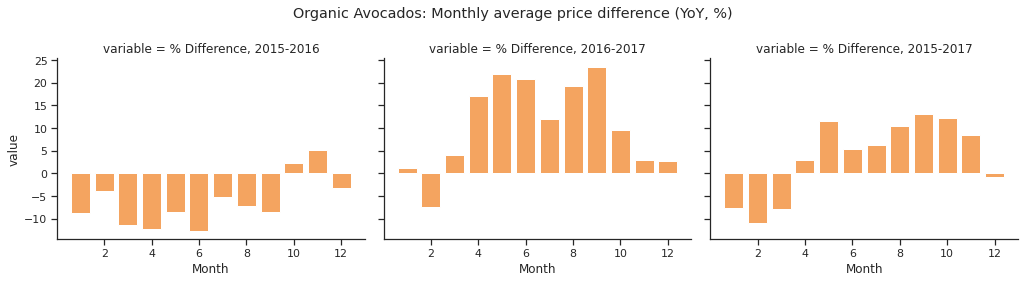

In [ ]:
#Looking at yearly changes in price for organic avocados (with monthly % diff in price)

a_org_2015 = a_org[a_org['Year'] == 2015].set_index('Month')
a_org_2015.rename(columns = {'AveragePrice':'2015'}, inplace = True) 
a_org_2016 = a_org[a_org['Year'] == 2016].set_index('Month')
a_org_2016.rename(columns = {'AveragePrice':'2016'}, inplace = True) 
a_org_2017 = a_org[a_org['Year'] == 2017].set_index('Month')
a_org_2017.rename(columns = {'AveragePrice':'2017'}, inplace = True) 

a_org_2015['2016'] = pd.Series(a_org_2016['2016'].astype(float))
a_org_2015['2017'] = pd.Series(a_org_2017['2017'].astype(float))
a_org_2015['% Difference, 2015-2016'] = (a_org_2015['2016'] - a_org_2015['2015'])/a_org_2015['2015'] * 100
a_org_2015['% Difference, 2016-2017'] = (a_org_2015['2017'] - a_org_2015['2016'])/a_org_2015['2016'] * 100
a_org_2015['% Difference, 2015-2017'] = (a_org_2015['2017'] - a_org_2015['2015'])/a_org_2015['2015'] * 100

a_org_2015 = a_org_2015.reset_index()

price_diff_org = pd.melt(a_org_2015, id_vars=['Month'], value_vars=['% Difference, 2015-2016', '% Difference, 2016-2017', '% Difference, 2015-2017'])

h = sns.FacetGrid(price_diff_org, col = "variable", height = 4, aspect = 1.2)
h.map(plt.bar, "Month", "value", color = "sandybrown")
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Organic Avocados: Monthly average price difference (YoY, %)')

There are a few key insights that we gain from measuring monthly price differences between years: 
1. Prices for conventional avocados rose at most 50% between 2015 and 2017, whereas prices for organic avocados only rose at most ~15% over the 2 year period. There seemed to be much more volatility in the prices of organic avocados than conventional avocados, leading to smaller price increase over the 2 year period. 

2. Average prices for both conventional and organic avocados fell between 5-10% between 2015 and 2016. Prices for organic avocados in 2016 remained below those prices in 2015 towards the end of 2016, whereas prices of conventional avocados recovered in 2016

3. Prices for both conventional and organic avocados rose most between 2016-2017 and peaked towards the end of 2017. 

Now that we can see potential monthly trends in avocado prices, we want understand if there are any actual seasonal trends in the data e.g. are avocados actually more expensive in the fall season. Furthmore, are avocados more expensive every fall, or are seasonal prices different every year (may not actually be seasonal trends).  

Text(0.5, 0.98, 'Organic Avocados: Seasonal Prices')

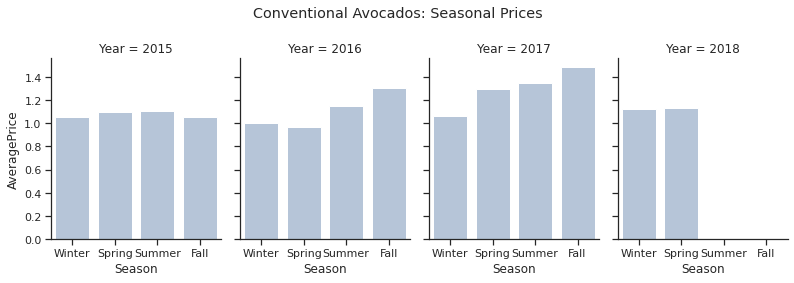

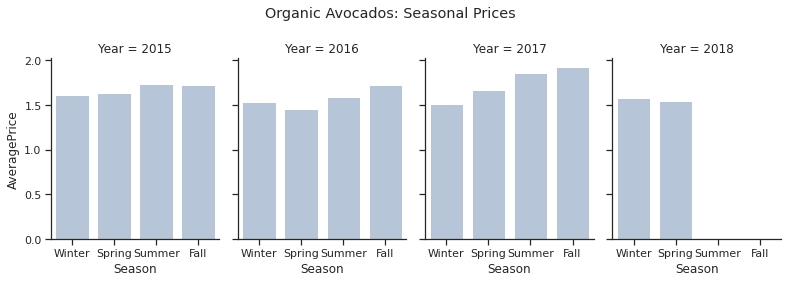

In [ ]:
#converting months into seasons
#Looking at average price per season for conventional and organic avocados

Season = []
for i in a_conv['Month']:
    j = (i%12 + 3)//3
    Season.append(j)

a_conv['Season'] = Season
a_org['Season'] = Season 

a_conv_s = a_conv.groupby(['Year', pd.Grouper(key = 'Season')])['AveragePrice'].mean().to_frame(name = "AveragePrice").reset_index()
a_org_s = a_org.groupby(['Year', pd.Grouper(key = 'Season')])['AveragePrice'].mean().to_frame(name = "AveragePrice").reset_index()


a_conv_s.loc[(a_conv_s.Season == 1),'Season']='Winter'
a_conv_s.loc[(a_conv_s.Season == 2),'Season']='Spring'
a_conv_s.loc[(a_conv_s.Season == 3),'Season']='Summer'
a_conv_s.loc[(a_conv_s.Season == 4),'Season']='Fall'
a_org_s.loc[(a_org_s.Season == 1),'Season']='Winter'
a_org_s.loc[(a_org_s.Season == 2),'Season']='Spring'
a_org_s.loc[(a_org_s.Season == 3),'Season']='Summer'
a_org_s.loc[(a_org_s.Season == 4),'Season']='Fall'

#TO-DO: FIX THE SEASONALITY???

g = sns.catplot(x = "Season", y = "AveragePrice", 
                col = "Year", 
                data = a_conv_s,
                kind = "bar",
                height=4, aspect=.7,
                palette=sns.color_palette(['lightsteelblue']))
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Conventional Avocados: Seasonal Prices')

h = sns.catplot(x = "Season", y = "AveragePrice", 
                col = "Year", 
                data = a_org_s,
                kind = "bar",
                height=4, aspect=.7,
                palette=sns.color_palette(['lightsteelblue']))
plt.subplots_adjust(top=0.8)
h.fig.suptitle('Organic Avocados: Seasonal Prices')


It looks like there is a seasonal trend between years. Prices are clearly at their highest for both conventional and organic avocados in the fall. Not only that, but prices seem to increase throughout the year, with summer prices being greater than spring prices, and spring prices being greater than winter prices etc. 

Next we want to look at regional differences in avocado prices. We have many different regions in our dataset, making it difficult to parse where in the country avocados are more expensive. In order to see if there are regional differences in price, or even if certain cities have higher prices than others, we should visualize average price per city on a map. 

In [ ]:
#The following code, up until the map is mapping out regional avocado prices 
#Changing regional data so we can use specific cities as locations rather than states or regions e.g. "northeast"

places = avocados.region.unique()
places = places.tolist()
places = [e for e in places if e not in ('California','GreatLakes', 'Midsouth', 'Northeast', 'NorthernNewEngland', 'Plains','SouthCarolina', 'SouthCentral', 'Southeast', 'TotalUS', 'West', 'WestTexNewMexico')]


In [ ]:
avo_regions = avocados[avocados['region'].isin(places)]

In [ ]:
def switchcase(arguement): 
    switcher = {
        "BaltimoreWashington": "Baltimore",
        "BuffaloRochester": "Buffalo",
        "CincinnatiDayton": "Cincinnati",
        "DallasFtWorth": "Dallas",
        "HarrisburgScranton": "Harrisburg",
        "HartfordSpringfield": "Hartford",
        "GrandRapids": "Grand Rapids",
        "LasVegas": "Las Vegas",
        "LosAngeles": "Los Angeles",
        "MiamiFtLauderdale": "Miami",
        "NewOrleansMobile": "New Orleans",
        "NewYork": "New York City",
        "PhoenixTucson": "Phoenix",
        "RaleighGreensboro": "Raleigh",
        "RichmondNorfolk": "Richmond",
        "SanDiego": "San Diego",
        "SanFrancisco": "San Francisco",
        "StLouis": "St. Louis"
    }
    return switcher.get(arguement, arguement)

region_new = []
for i in avo_regions['region']: 
    region_new.append(switchcase(i))

avo_regions['region_new'] = region_new

n_reg = avo_regions.region_new.unique().tolist()


In [ ]:
!pip install opencage

In [ ]:
from opencage.geocoder import OpenCageGeocode

In [ ]:
key = "5569f7ee777c4a509cfd4aa4afb480f9"
geocoder = OpenCageGeocode(key)

list_lat = []
list_long = []

for i in n_reg: 
    query = i + ", USA"
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)

In [ ]:
!pip install geopandas

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.preprocessing import LabelEncoder 

enc = LabelEncoder()

volume_by_region = avo_regions.groupby(['region_new'])['Total Volume'].mean().to_frame(name = "Total Volume").reset_index()

price_by_region = avo_regions.groupby(['region_new'])['AveragePrice'].mean().to_frame(name = "AveragePrice").reset_index()
price_by_region['latitude'] = list_lat
price_by_region['longitude'] = list_long
price_by_region['Total Volume'] = volume_by_region['Total Volume']

price_by_region['size'] = pd.qcut(price_by_region['AveragePrice'], 4)
price_by_region['size'] = enc.fit_transform(price_by_region['size'])

def switcheroo(arguement): 
    switcher = {
        0: 1,
        1: 2,
        2: 3,
        3: 4,
    }
    return switcher.get(arguement, arguement)

size_new = []
for i in price_by_region['size']: 
    size_new.append(switcheroo(i))

price_by_region['size'] = size_new

crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(price_by_region['longitude'], price_by_region['latitude'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(price_by_region, 
                          crs = crs, 
                          geometry = geometry)

geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,region_new,AveragePrice,latitude,longitude,Total Volume,size,geometry
0,Albany,1.561036,42.651167,-73.754968,47537.869734,4,POINT (-73.75497 42.65117)
1,Atlanta,1.337959,33.749099,-84.390185,262145.322041,2,POINT (-84.39018 33.74910)
2,Baltimore,1.534231,39.284749,-76.620475,398561.891479,4,POINT (-76.62047 39.28475)
3,Boise,1.348136,43.616616,-116.200886,42642.567308,2,POINT (-116.20089 43.61662)
4,Boston,1.530888,42.360253,-71.058291,287792.854527,4,POINT (-71.05829 42.36025)


In [ ]:
price_by_region['region_cat'] = pd.qcut(price_by_region['longitude'], 4)
price_by_region.head()


,region_new,AveragePrice,latitude,longitude,Total Volume,size,geometry,region_cat
0,Albany,1.561036,42.651167,-73.754968,47537.869734,4,POINT (-73.75497 42.65117),"(-79.144, -71.058]"
1,Atlanta,1.337959,33.749099,-84.390185,262145.322041,2,POINT (-84.39018 33.74910),"(-84.451, -79.144]"
2,Baltimore,1.534231,39.284749,-76.620475,398561.891479,4,POINT (-76.62047 39.28475),"(-79.144, -71.058]"
3,Boise,1.348136,43.616616,-116.200886,42642.567308,2,POINT (-116.20089 43.61662),"(-122.67500000000001, -102.938]"
4,Boston,1.530888,42.360253,-71.058291,287792.854527,4,POINT (-71.05829 42.36025),"(-79.144, -71.058]"


In [ ]:
#Please upload all the files in the folder labeled "cb_2018_us_state_5m"
uploads = files.upload()

(24.0, 52.0)

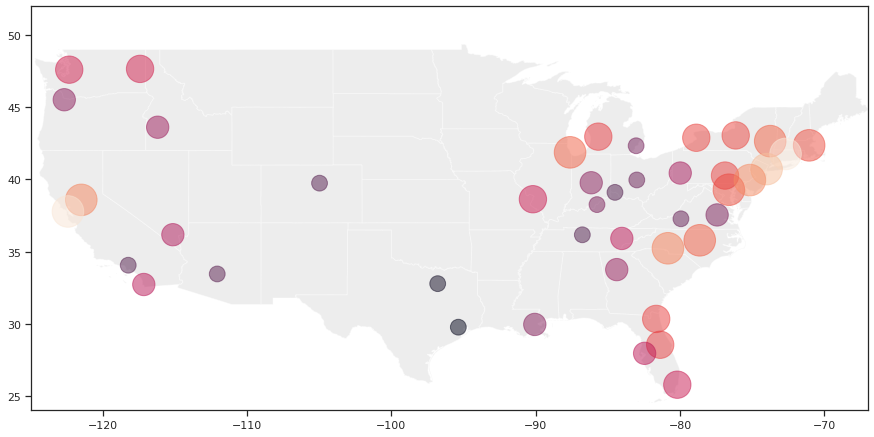

In [ ]:
street_map = gpd.read_file('cb_2018_us_state_5m.shp')
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "lightgrey")

geo_df.plot(column="AveragePrice",ax=ax,alpha=0.5,markersize=geo_df['size']*250)
plt.xlim(-125,-67)
plt.ylim(24,52)


There are a few things we can discern from the geographic data. 
1. Avocado prices are higher along the coasts, particularly California and New York. 
2. Avocado prices are lowest in Texas, and the Midwest (apart from Chicago). 
3. Avocado prices are highest in more populous cities e.g. San Francisco, Chicago, New York City, Philadelphia etc. 

Let's take a look at the geographic distribution of volume of avocados sold. It'll be interesting to see if lower volumes moved per region inversely correlated with higher prices, or if we can isolate regional differences in price to demand factors/higher incomes/higher cost of living in certain cities. 

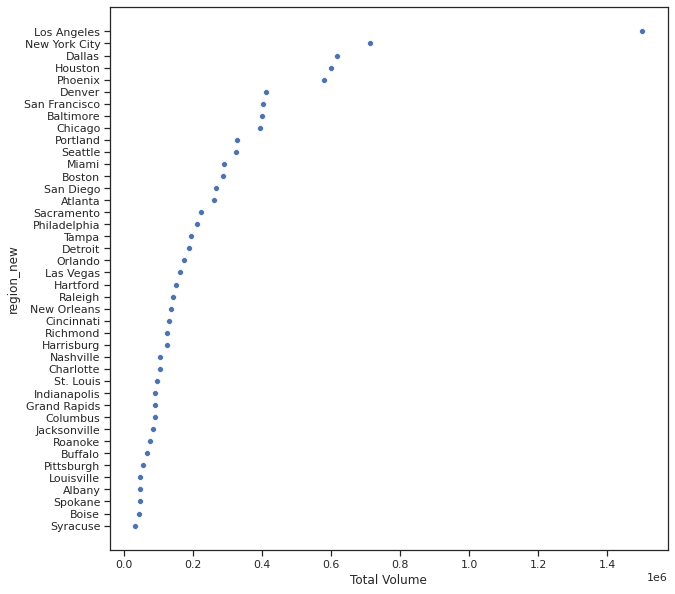

In [ ]:
#total volume by city 

V = geo_df.sort_values(by='Total Volume')
plt.figure(figsize=(10, 10))
sns.scatterplot(x=V['Total Volume'], y=V['region_new'])


# What other analysis do I want to do?
# Should I turn this into a classification problem and test a bunch of different models on it?
# Should I take a look at plotting volume moved on a map?

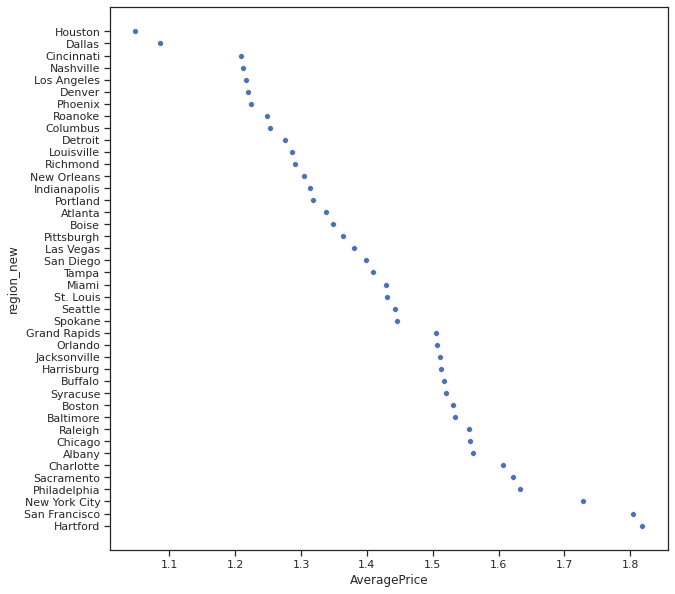

In [ ]:
#average price by city 

P = geo_df.sort_values(by='AveragePrice', ascending=False)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=P['AveragePrice'], y=P['region_new'])

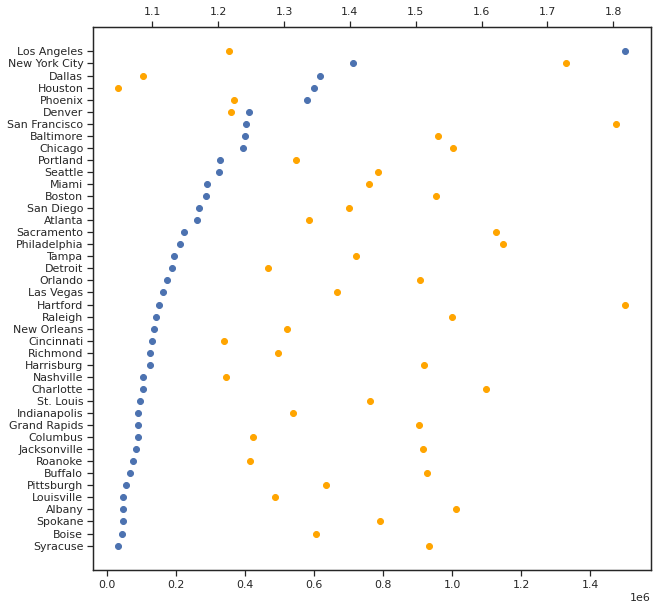

In [ ]:
#volume vs price per city (with different axes)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(V['Total Volume'], V['region_new'])

ax2 = ax.twiny()
ax2.scatter(V['AveragePrice'], V['region_new'], color = "orange")
#ax2.plot(V['AveragePrice'], V['region_new'], color = "orange")

Though avocado supply and avocado price have an inverse relationship overall, when we split price and volume by city, we see that there's no relationship between the volume of avocados moved and the average price of avocados in that area. Cities with large volumes of avocados e.g. Los Angeles, have low avocado prices and cities with low volumes of avocados e.g. Syracuse, have mid-high prices. There is no discernable trend. 

Perhaps a better predictor of avocado prices by region is volume of avocados per capita in a given city. Let's see if we can see any correlation between price and volume using volume per capita for the year 2017 (population data taken from the US census bureau. 

It might also be really interesting to compare a city's GDP per capita in 2015-2017 to avocado prices. My hypothesis is that cities with higher GDPs generally tend to see greater avocado prices. This will be a goal for another project.  

Altogether though, there aren't really many useful geographic trends. 

In [ ]:
#Data pre-processing and feature engineering on our original dataset 

avo_df = avocados
avo_df = avo_df.drop(['Unnamed: 0','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'], axis = 1).reset_index()

#extracting seasons from monthly data 
season = []
for i in avo_df['Month']:
    j = (i%12 + 3)//3
    season.append(j)

avo_df['Season'] = season

avo_df.loc[(avo_df.Season == 1),'Season']='Winter'
avo_df.loc[(avo_df.Season == 2),'Season']='Spring'
avo_df.loc[(avo_df.Season == 3),'Season']='Summer'
avo_df.loc[(avo_df.Season == 4),'Season']='Fall'

avo_df.loc[(avo_df.Month == 1),'Month']='January'
avo_df.loc[(avo_df.Month == 2),'Month']='February'
avo_df.loc[(avo_df.Month == 3),'Month']='March'
avo_df.loc[(avo_df.Month == 4),'Month']='April'
avo_df.loc[(avo_df.Month == 5),'Month']='May'
avo_df.loc[(avo_df.Month == 6),'Month']='June'
avo_df.loc[(avo_df.Month == 7),'Month']='July'
avo_df.loc[(avo_df.Month == 8),'Month']='August'
avo_df.loc[(avo_df.Month == 9),'Month']='September'
avo_df.loc[(avo_df.Month == 10),'Month']='October'
avo_df.loc[(avo_df.Month == 11),'Month']='November'
avo_df.loc[(avo_df.Month == 12),'Month']='December'


#removing 2018 data because we only have data for the first three months as opposed to yearly data for 2015-2017
avo_df = avo_df[avo_df['Year'] != 2018]

#changing regional data to represent unique cities rather than areas 

def switchcase(arguement): 
    switcher = {
        "BaltimoreWashington": "Baltimore",
        "BuffaloRochester": "Buffalo",
        "CincinnatiDayton": "Cincinnati",
        "DallasFtWorth": "Dallas",
        "HarrisburgScranton": "Harrisburg",
        "HartfordSpringfield": "Hartford",
        "GrandRapids": "Grand Rapids",
        "LasVegas": "Las Vegas",
        "LosAngeles": "Los Angeles",
        "MiamiFtLauderdale": "Miami",
        "NewOrleansMobile": "New Orleans",
        "NewYork": "New York City",
        "PhoenixTucson": "Phoenix",
        "RaleighGreensboro": "Raleigh",
        "RichmondNorfolk": "Richmond",
        "SanDiego": "San Diego",
        "SanFrancisco": "San Francisco",
        "StLouis": "St. Louis"
    }
    return switcher.get(arguement, arguement)

region_new = []
for i in avo_df['region']: 
    region_new.append(switchcase(i))

avo_df['region_new'] = region_new

n = avo_df.region_new.unique().tolist()

places = avo_df.region_new.unique()
places = places.tolist()
places = [e for e in places if e not in ('California','GreatLakes', 'Midsouth', 'Northeast', 'NorthernNewEngland', 'Plains','SouthCarolina', 'SouthCentral', 'Southeast', 'TotalUS', 'West', 'WestTexNewMexico')]

avo_df = avo_df[avo_df['region_new'].isin(places)]

#Putting those unique cities into 4 distinct areas of the country based on the trends we discovered during the data exploration phase 
West = ['Los Angeles', 'San Francsico', 'Denver', 'Portland', 'Seattle', 'San Diego', 'Sacramento', 'Las Vegas', 'Phoenix', 'Spokane', 'Boise']
MidSouth = ['Dallas', 'Houston', 'Chicago', 'Detroit', 'Cincinnati', 'Nashville', 'St. Louis', 'Indianapolis', 'Grand Rapids', 'Columbus', 'Louisville']
NorthEast = ['New York City', 'Baltimore', 'Boston', 'Philadelphia', 'Hartford', 'Buffalo', 'Syracuse', 'Albany', 'Pittsburgh', 'Harrisburg']
SouthEast = ['Miami', 'Tampa', 'Atlanta', 'Orlando', 'Raleigh', 'New Orleans', 'Richmond', 'Charlotte', 'Jacksonville', 'Roanoke']

s = pd.Series(avo_df['region_new']).tolist()

r = []
for i in s:
    if i in MidSouth: 
        r.append("MidSouth")
    elif i in NorthEast: 
        r.append("NorthEast")
    elif i in SouthEast: 
        r.append("SouthEast")
    else: 
        r.append("West")

avo_df['distinct_region'] = r

enc = LabelEncoder()
# avo_df['distinct_region'] = enc.fit_transform(avo_df['distinct_region'])
# avo_df['type'] = enc.fit_transform(avo_df['type'])
# avo_df['Year'] = enc.fit_transform(avo_df['Year'])
# avo_df['Season'] = enc.fit_transform(avo_df['Season'])
# avo_df['Month'] = enc.fit_transform(avo_df['Month'])

avo_df = avo_df.drop(['region', 'region_new', 'Date'], axis = 1)

#Now we have to deal with our continuous variables e.g. should we transform these variables in a certain way?
#I've decided to use minmaxscaler to transform our volume variable

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()
avo_df[['Total Volume', 'AveragePrice']] = ss.fit_transform(avo_df[['Total Volume', 'AveragePrice']])

avo_df['Year'] = avo_df['Year'].apply(str)

avo_df2 = avo_df.drop(['AveragePrice', 'Total Volume'], axis=1)
avo_df3 = pd.get_dummies(avo_df2)

avo_df = pd.concat([avo_df, avo_df3], axis=1)
avo_df = avo_df.drop(['type', 'Year', 'Month', 'Season', 'distinct_region', 'index'], axis=1)

avo_df['AveragePrice_clf'] = pd.qcut(avo_df['AveragePrice'], 3)

avo_df['AveragePrice_clf'] = enc.fit_transform(avo_df['AveragePrice_clf'])

avo_df



,AveragePrice,Total Volume,type_conventional,type_organic,Year_2015,Year_2016,Year_2017,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Season_Fall,Season_Spring,Season_Summer,Season_Winter,distinct_region_MidSouth,distinct_region_NorthEast,distinct_region_SouthEast,distinct_region_West,AveragePrice_clf
0,-0.217977,-0.411142,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,-0.170403,-0.432657,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2,-1.169466,-0.287048,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,-0.812658,-0.377223,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,-0.336914,-0.441478,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17439,0.019895,-0.546732,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
17440,-0.527211,-0.542851,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
17441,-0.503424,-0.541504,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
17442,-0.503424,-0.543815,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


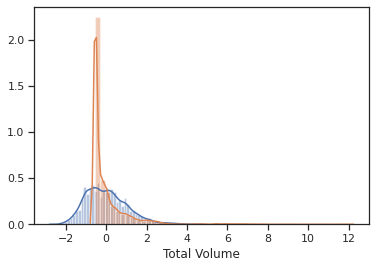

In [ ]:
sns.distplot(avo_df['AveragePrice'])
sns.distplot(avo_df['Total Volume'])

After transforming out features, we're left with 13,188 rows and 27 columns of data. Using this data, we can start using machine learning to predict avocado prices. In this project, we will use XGBoost, and lasso regression. 

In [ ]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(avo_df['AveragePrice'])
X = avo_df.drop(['AveragePrice', 'AveragePrice_clf'], axis = 1)

X_train, X_dev_test, y_train, y_dev_test = train_test_split(X, y, test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5)


In [ ]:
#regression model 

from sklearn.linear_model import LinearRegression
from sklearn import ensemble
import xgboost as xgb

classifiers = [LinearRegression(),
               ensemble.GradientBoostingRegressor(n_estimators = 500, 
                                                  max_depth = 10, 
                                                  min_samples_split = 100, 
                                                  learning_rate = 0.1,
                                                  loss = 'ls', 
                                                  max_features = 'sqrt',
                                                  subsample = 0.8,
                                                  random_state = 40),
               xgb.XGBRegressor(colsample_bytree=0.5,
                                gamma=0.0,
                                learning_rate=0.05,
                                max_depth=8,
                                min_child_weight=1.5,
                                n_estimators=500,
                                reg_alpha=0.0001,
                                reg_lambda=0.5,
                                subsample=0.5,
                                seed=40,
                                silent=1)]

Classifier = ['Linear Regression', 'Gradient Boosting Regression', 'XGBoost']
train_acc = []
test_acc = []

for i in classifiers: 
    i.fit(X_train, y_train)
    tr = i.score(X_train, y_train)
    te = i.score(X_test, y_test)
    train_acc.append(tr)
    test_acc.append(te)

print(train_acc)

Accuracy = pd.DataFrame(
    {'Classifier': Classifier,
     'Train Acc': train_acc,
     'Test Acc': test_acc}
)


In [ ]:
display(Accuracy)

,Classifier,Train Acc,Test Acc
0,Linear Regression,0.517291,0.535389
1,Gradient Boosting Regression,0.870377,0.714647
2,XGBoost,0.857328,0.711797


In [ ]:
from sklearn.model_selection import train_test_split

y1 = pd.DataFrame(avo_df['AveragePrice_clf'])
X1 = avo_df.drop(['AveragePrice_clf', 'AveragePrice'], axis = 1)

X1_train, X1_dev_test, y1_train, y1_dev_test = train_test_split(X1, y1, test_size=0.2)
X1_dev, X1_test, y1_dev, y1_test = train_test_split(X1_dev_test, y1_dev_test, test_size=0.5)

display(y_dev)

In [ ]:
#classification model 

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost

classifiers = [
    Perceptron(),
    LinearSVC(C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=80),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    xgboost.XGBClassifier(n_estimators=80)]

train_acc = []
test_acc = []

for i in classifiers: 
    i.fit(X1_train, y1_train)
    tr = i.score(X1_train, y1_train)
    te = i.score(X1_test, y1_test)
    train_acc.append(tr)
    test_acc.append(te)


In [ ]:
classifier = ['Perceptron', 'Linear SVC', 'SVC', 'Decision Tree', 'Random Forest', 'MLP', 'AdaBoost', 'XGBoost']

Accuracy_clf = pd.DataFrame(
    {'Classifier': classifier,
     'Train Acc': train_acc,
     'Test Acc': test_acc}
)

display(Accuracy_clf)

,Classifier,Train Acc,Test Acc
0,Perceptron,0.936209,0.937832
1,Linear SVC,0.881611,0.887794
2,SVC,0.914028,0.877938
3,Decision Tree,1.000000,1.000000
4,Random Forest,0.999716,1.000000
5,MLP,0.977441,0.976497
6,AdaBoost,1.000000,1.000000
7,XGBoost,1.000000,1.000000
